In [1]:
from numpy import mat
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error 


In [2]:
data = pd.read_csv('C:\\Users\\nidhi\\OneDrive\\Desktop\\Major_Project\\data.csv')

In [3]:
#Display first 5 rows
data.head()

,longitude,latitude,housing_age,total_rooms,total_bedrooms,population,households,income,house_value,County,state,country,ocean_proximity
0,-124.35,40.54,52,1820,300.0,806,270,3.0147,94600,Humboldt County,California,United States,NEAR OCEAN
1,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,Del Norte County,California,United States,NEAR OCEAN
2,-124.30,41.84,17,2677,531.0,1244,456,3.0313,103600,Del Norte County,California,United States,NEAR OCEAN
3,-124.27,40.69,36,2349,528.0,1194,465,2.5179,79000,Humboldt County,California,United States,NEAR OCEAN
4,-124.26,40.58,52,2217,394.0,907,369,2.3571,111400,Humboldt County,California,United States,NEAR OCEAN


In [4]:
#Display last 5 rows
data.tail()

,longitude,latitude,housing_age,total_rooms,total_bedrooms,population,households,income,house_value,County,state,country,ocean_proximity
20635,-114.56,33.69,17,720,174.0,333,117,1.6509,85700,Riverside County,California,United States,INLAND
20636,-114.55,32.80,19,2570,820.0,1431,608,1.2750,56100,Imperial County,California,United States,INLAND
20637,-114.49,33.97,17,2809,635.0,83,45,1.6154,87500,La Paz County,Arizona,United States,INLAND
20638,-114.47,34.40,19,7650,1901.0,1129,463,1.8200,80100,San Bernardino County,California,United States,INLAND
20639,-114.31,34.19,15,5612,1283.0,1015,472,1.4936,66900,San Bernardino County,California,United States,INLAND


In [5]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        20640 non-null  float64
 1   latitude         20640 non-null  float64
 2   housing_age      20640 non-null  int64  
 3   total_rooms      20640 non-null  int64  
 4   total_bedrooms   20433 non-null  float64
 5   population       20640 non-null  int64  
 6   households       20640 non-null  int64  
 7   income           20640 non-null  float64
 8   house_value      20640 non-null  int64  
 9   County           20255 non-null  object 
 10  state            20639 non-null  object 
 11  country          20639 non-null  object 
 12  ocean_proximity  20640 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 2.0+ MB


In [6]:
data.describe()
#shape
data.shape


(20640, 13)

In [7]:
#housing["ocean_proximity"].value_counts()

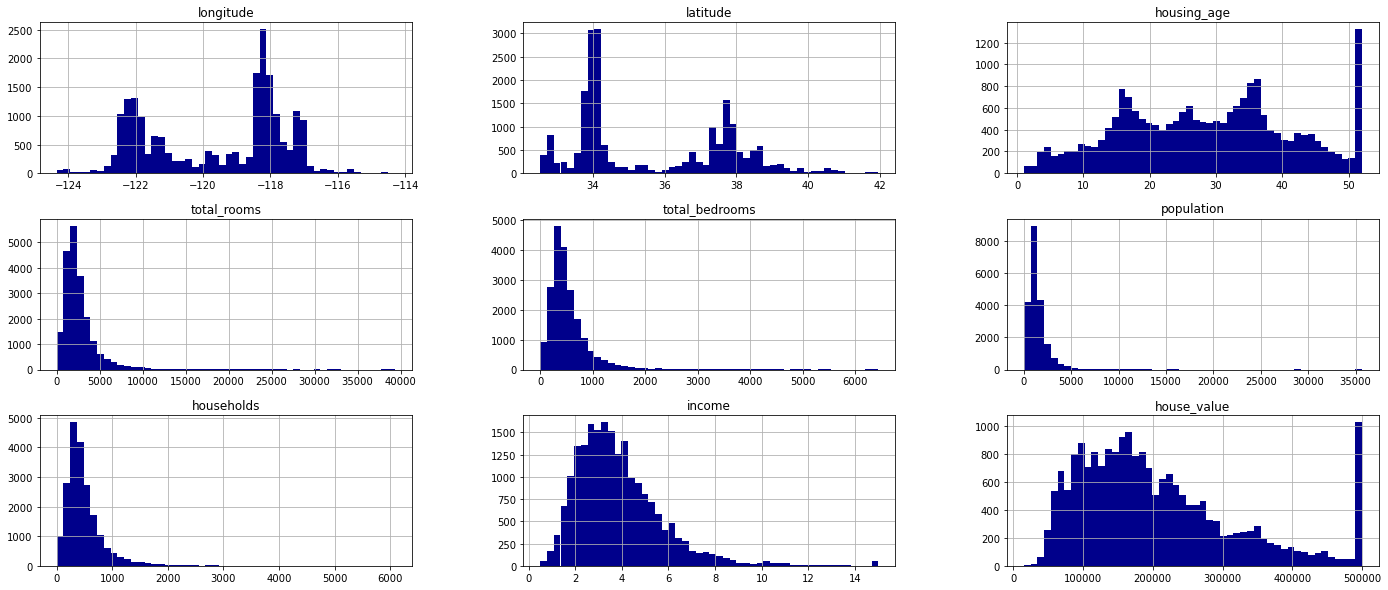

In [7]:
data.hist(bins=50, figsize=(24,10) , color='darkblue')
plt.show()

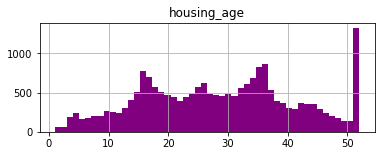

In [8]:
data.hist("housing_age",bins=50, figsize=(6,2),color='purple')
plt.show()

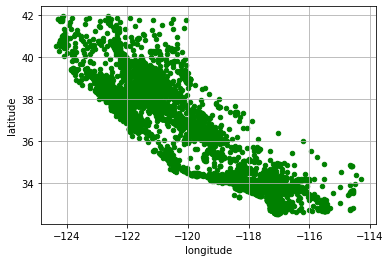

In [9]:
data.plot(kind="scatter", x="longitude", y="latitude",grid=True,color='green')
plt.show()

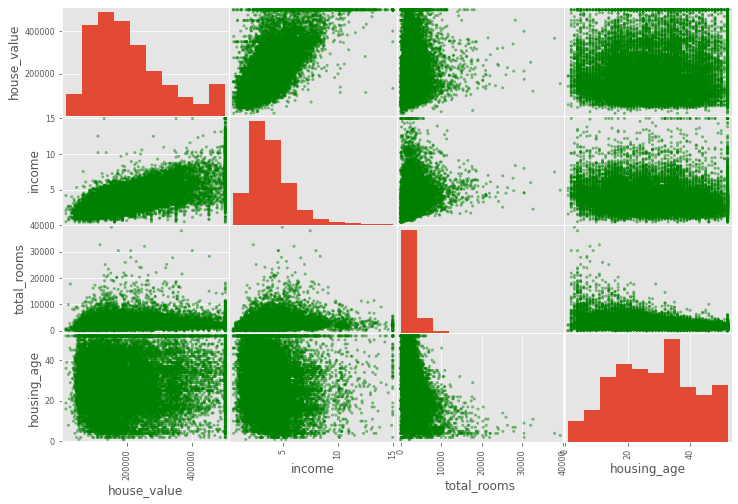

In [10]:
from pandas.plotting import scatter_matrix
plt.style.use('ggplot')
attributes = ["house_value","income","total_rooms","housing_age"]
scatter_matrix(data[attributes],figsize=(12, 8),color="green")
plt.show()

In [11]:
data["housing_price_range"] = pd.cut(data["house_value"],bins=[0,100000,200000,300000,400000,np.inf],labels=[0,1,2,3,4])
data["income_cat"]=pd.cut(data["income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[0,1,2,3,4])

In [12]:
corrr_matrix=data.corr()

In [13]:
corrr_matrix["house_value"].sort_values(ascending=False)

house_value       1.000000
income            0.688075
total_rooms       0.134153
housing_age       0.105623
households        0.065843
total_bedrooms    0.049686
population       -0.024650
longitude        -0.045967
latitude         -0.144160
Name: house_value, dtype: float64

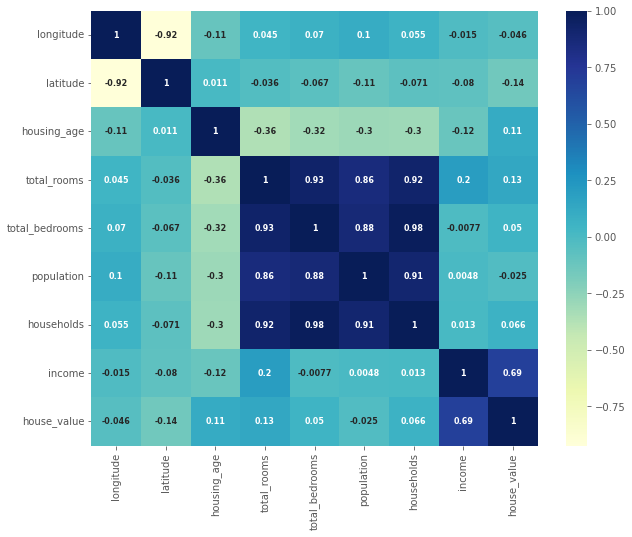

In [14]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True,annot_kws={"size":8,"weight":"bold"},cbar=True)
plt.gcf().set_size_inches(10,8)
plt.show ()


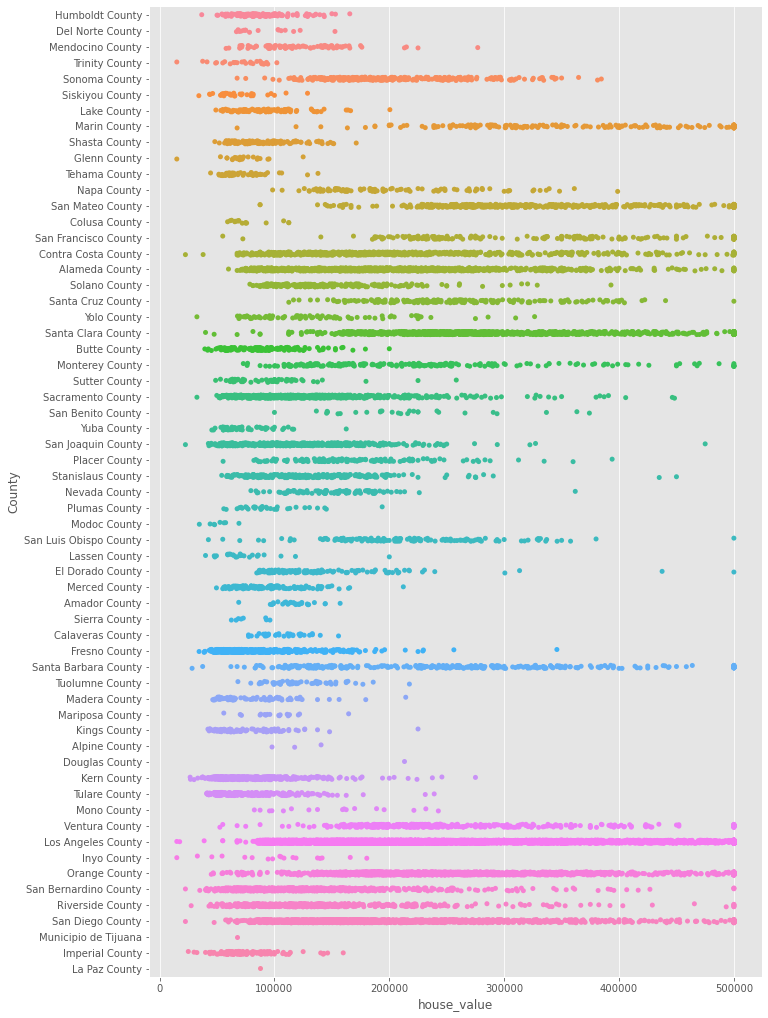

In [15]:
sns.catplot(data=data,x="house_value",y="County",kind="strip")
plt.gcf().set_size_inches(16,16)
plt.show ()

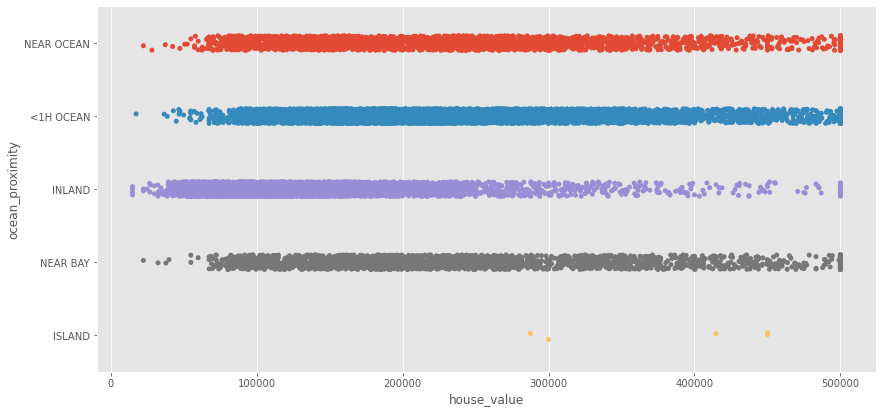

In [16]:
sns.catplot(data=data,x="house_value",y="ocean_proximity",kind="strip")
plt.gcf().set_size_inches(16,6)
plt.show ()

In [17]:
data

,longitude,latitude,housing_age,total_rooms,total_bedrooms,population,households,income,house_value,County,state,country,ocean_proximity,housing_price_range,income_cat
0,-124.35,40.54,52,1820,300.0,806,270,3.0147,94600,Humboldt County,California,United States,NEAR OCEAN,0,2
1,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,Del Norte County,California,United States,NEAR OCEAN,0,1
2,-124.30,41.84,17,2677,531.0,1244,456,3.0313,103600,Del Norte County,California,United States,NEAR OCEAN,1,2
3,-124.27,40.69,36,2349,528.0,1194,465,2.5179,79000,Humboldt County,California,United States,NEAR OCEAN,0,1
4,-124.26,40.58,52,2217,394.0,907,369,2.3571,111400,Humboldt County,California,United States,NEAR OCEAN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-114.56,33.69,17,720,174.0,333,117,1.6509,85700,Riverside County,California,United States,INLAND,0,1
20636,-114.55,32.80,19,2570,820.0,1431,608,1.2750,56100,Imperial County,California,United States,INLAND,0,0
20637,-114.49,33.97,17,2809,635.0,83,45,1.6154,87500,La Paz County,Arizona,United States,INLAND,0,1
20638,-114.47,34.40,19,7650,1901.0,1129,463,1.8200,80100,San Bernardino County,California,United States,INLAND,0,1


In [18]:
#Check Null Values
data.isnull

<bound method DataFrame.isnull of        longitude  latitude  housing_age  total_rooms  total_bedrooms  \
0        -124.35     40.54           52         1820           300.0   
1        -124.30     41.80           19         2672           552.0   
2        -124.30     41.84           17         2677           531.0   
3        -124.27     40.69           36         2349           528.0   
4        -124.26     40.58           52         2217           394.0   
...          ...       ...          ...          ...             ...   
20635    -114.56     33.69           17          720           174.0   
20636    -114.55     32.80           19         2570           820.0   
20637    -114.49     33.97           17         2809           635.0   
20638    -114.47     34.40           19         7650          1901.0   
20639    -114.31     34.19           15         5612          1283.0   

       population  households  income  house_value                 County  \
0             806       

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20640 non-null  float64 
 1   latitude             20640 non-null  float64 
 2   housing_age          20640 non-null  int64   
 3   total_rooms          20640 non-null  int64   
 4   total_bedrooms       20433 non-null  float64 
 5   population           20640 non-null  int64   
 6   households           20640 non-null  int64   
 7   income               20640 non-null  float64 
 8   house_value          20640 non-null  int64   
 9   County               20255 non-null  object  
 10  state                20639 non-null  object  
 11  country              20639 non-null  object  
 12  ocean_proximity      20640 non-null  object  
 13  housing_price_range  20640 non-null  category
 14  income_cat           20640 non-null  category
dtypes: category(2), flo

In [22]:
A=data.drop("housing_price_range",axis=1)
X=A.drop("house_value",axis=1)
y=data["housing_price_range"]

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   longitude        20640 non-null  float64 
 1   latitude         20640 non-null  float64 
 2   housing_age      20640 non-null  int64   
 3   total_rooms      20640 non-null  int64   
 4   total_bedrooms   20433 non-null  float64 
 5   population       20640 non-null  int64   
 6   households       20640 non-null  int64   
 7   income           20640 non-null  float64 
 8   County           20255 non-null  object  
 9   state            20639 non-null  object  
 10  country          20639 non-null  object  
 11  ocean_proximity  20640 non-null  object  
 12  income_cat       20640 non-null  category
dtypes: category(1), float64(4), int64(4), object(4)
memory usage: 1.9+ MB


In [24]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: housing_price_range
Non-Null Count  Dtype   
--------------  -----   
20640 non-null  category
dtypes: category(1)
memory usage: 20.5 KB


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

In [26]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [27]:
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),
                          OneHotEncoder(handle_unknown="ignore"))

In [28]:
log_pipeline=make_pipeline(
   SimpleImputer(strategy="median"),
   FunctionTransformer(np.log),
   StandardScaler())

In [29]:
preprocessing=ColumnTransformer([
    ("log",log_pipeline,["total_bedrooms","total_rooms","population","households"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include=object)),
],
    remainder=num_pipeline)


In [30]:
housing_prepared=preprocessing.fit_transform(X)

In [31]:
housing_prepared.shape

(20640, 81)

In [32]:
#type(housing_prepared)

In [33]:
#df = pd.DataFrame(housing_prepared.toarray())

In [34]:
#housing_prepared.toarray("C:\\Users\\nidhi\\OneDrive\\Desktop\\Testing\\housing_prepared.csv")

In [35]:
#df.info()

In [36]:
#df.to_csv("C:\\Users\\nidhi\\OneDrive\\Desktop\\Testing\\df.csv")

In [37]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(housing_prepared,y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(housing_prepared,y, stratify=income_cat, test_size=0.2, random_state=42)

In [38]:
y_train.shape,y_test.shape

((16512,), (4128,))

In [39]:
X_train.shape, X_test.shape

((16512, 81), (4128, 81))

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg=LogisticRegression(max_iter=3000)

In [43]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [44]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [45]:
log_reg_train_accuracy = accuracy_score(y_train, y_train_pred)
log_reg_train_mcc = matthews_corrcoef(y_train, y_train_pred)
log_reg_train_precision_score =precision_score(y_train,y_train_pred,average='weighted')
log_reg_train_recall_score=recall_score(y_train,y_train_pred,average='weighted')
log_reg_train_f1 = f1_score(y_train, y_train_pred,average="weighted")
log_reg_test_accuracy = accuracy_score(y_test, y_test_pred)
log_reg_test_mcc = matthews_corrcoef(y_test, y_test_pred)
log_reg_test_precision_score = precision_score(y_test,y_test_pred,average='weighted')
log_reg_test_recall_score = recall_score(y_test,y_test_pred,average='weighted')
log_reg_test_f1 = f1_score(y_test, y_test_pred,average="weighted")


In [46]:
print("Model Performance on training Set")
print("Accuracy: %s" % log_reg_train_accuracy)
print("MCC: %s" % log_reg_train_mcc)
print("precision_score: %s" % log_reg_train_precision_score)
print("recall_score: %s" % log_reg_train_recall_score)
print("F1_Score: %s" % log_reg_train_f1)

Model Performance on training Set
Accuracy: 0.6789001937984496
MCC: 0.5545508411739671
precision_score: 0.6738431875965691
recall_score: 0.6789001937984496
F1_Score: 0.6684645824522114


In [47]:
print("Model Performance on test Set")
print("Accuracy: %s" % log_reg_test_accuracy)
print("MCC: %s" % log_reg_test_mcc)
print("precision_score: %s" % log_reg_test_precision_score)
print("recall_score: %s" % log_reg_test_recall_score)
print("F1_Score: %s" % log_reg_test_f1)

Model Performance on test Set
Accuracy: 0.6627906976744186
MCC: 0.5316777123453431
precision_score: 0.6588764555442914
recall_score: 0.6627906976744186
F1_Score: 0.6541605334276356


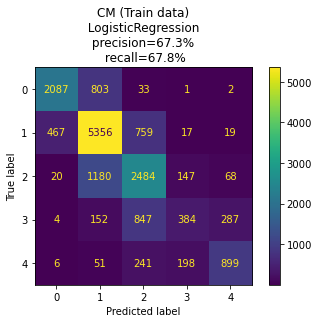

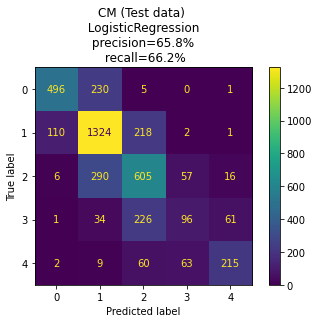

In [48]:
import seaborn as sns 
import pylab as pl
# Try resetting it 
sns.reset_orig() 
cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
pl.title('CM (Train data)\n LogisticRegression \n precision=67.3% \n recall=67.8%')
pl.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
pl.title('CM (Test data) \n LogisticRegression \n precision=65.8% \n recall=66.2%')
pl.show()

In [49]:
y_test_pred[1005:1015]



array([0, 4, 1, 1, 2, 4, 1, 2, 1, 4], dtype=int64)

In [50]:
y_train_pred[5005:5015]


array([2, 1, 1, 1, 1, 2, 4, 4, 1, 1], dtype=int64)

In [51]:
y_test.iloc[1005:1015].values

[0, 4, 1, 2, 3, 4, 2, 2, 1, 3]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn=KNeighborsClassifier(3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [55]:
knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred)
knn_train_f1 = f1_score(y_train, y_train_pred,average="weighted")
knn_train_precision_score =precision_score(y_train,y_train_pred,average='weighted')
knn_train_recall_score=recall_score(y_train,y_train_pred,average='weighted')

In [56]:
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred)
knn_test_f1 = f1_score(y_test, y_test_pred,average="weighted")
knn_test_precision_score = precision_score(y_test,y_test_pred,average='weighted')
knn_test_recall_score = recall_score(y_test,y_test_pred,average='weighted')

In [57]:
print("Model Performance on training Set")
print("Accuracy: %s" % knn_train_accuracy)
print("MCC: %s" % knn_train_mcc)
print("F1_Score: %s" % knn_train_f1)
print("Precision_Score: %s" % knn_train_precision_score)
print("recall_score: %s" % knn_train_recall_score)

Model Performance on training Set
Accuracy: 0.7886991279069767
MCC: 0.7089040566565913
F1_Score: 0.785276520025964
Precision_Score: 0.7883895438171145
recall_score: 0.7886991279069767


In [58]:
print("Model Performance on test Set")
print("Accuracy: %s" % knn_test_accuracy)
print("MCC: %s" % knn_test_mcc)
print("F1_Score: %s" % knn_test_f1)
print("Precision_Score: %s" % knn_test_precision_score)
print("recall_score: %s" % knn_test_recall_score)

Model Performance on test Set
Accuracy: 0.6187015503875969
MCC: 0.4725959760680896
F1_Score: 0.6141016638778675
Precision_Score: 0.6149556423915191
recall_score: 0.6187015503875969


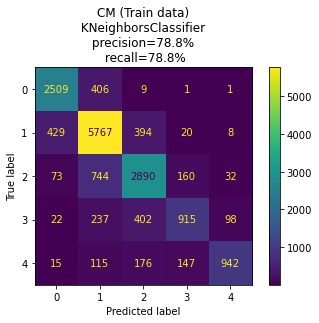

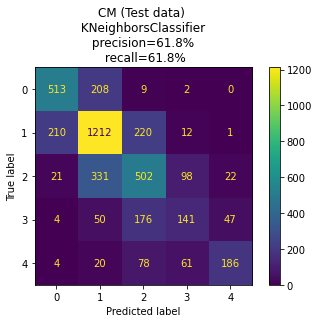

In [59]:
import seaborn as sns 
import pylab as pl
# Try resetting it 
sns.reset_orig() 
cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
pl.title('CM (Train data)\n KNeighborsClassifier \n precision=78.8% \n recall=78.8%')
pl.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
pl.title('CM (Test data) \n KNeighborsClassifier \n precision=61.8% \n recall=61.8%')
pl.show()

In [60]:
y_test_pred[1005:1015]

array([0, 4, 1, 1, 3, 4, 2, 2, 0, 2], dtype=int64)

In [61]:
y_train_pred[5005:5015]

array([3, 1, 1, 1, 1, 2, 4, 4, 1, 1], dtype=int64)

In [62]:
from sklearn.svm import SVC
svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train,y_train)

SVC(C=1, gamma=2)

In [63]:
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

In [64]:
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred)
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred)
svm_rbf_train_f1 = f1_score(y_train, y_train_pred,average="weighted")
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred)
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred)
svm_rbf_test_f1 = f1_score(y_test, y_test_pred,average="weighted")
svm_rbf_train_precision_score =precision_score(y_train,y_train_pred,average='weighted')
svm_rbf_train_recall_score=recall_score(y_train,y_train_pred,average='weighted')
svm_rbf_test_precision_score = precision_score(y_test,y_test_pred,average='weighted')
svm_rbf_test_recall_score = recall_score(y_test,y_test_pred,average='weighted')

print("Model Performance on training Set")
print("Accuracy: %s" % svm_rbf_train_accuracy)
print("MCC: %s" % svm_rbf_train_mcc)
print("F1_Score: %s" % svm_rbf_train_f1)
print("Precision_Score: %s" % svm_rbf_train_precision_score)
print("recall_score: %s" % svm_rbf_train_recall_score)
print("Model Performance on testt")
print("Accuracy: %s" % svm_rbf_test_accuracy)
print("MCC: %s" % svm_rbf_test_mcc)
print("F1_Score: %s" % svm_rbf_test_f1)
print("Precision_Score: %s" % svm_rbf_test_precision_score)
print("recall_score: %s" % svm_rbf_test_recall_score)


Model Performance on training Set
Accuracy: 0.8571342054263565
MCC: 0.8038155337371798
F1_Score: 0.8554973049497844
Precision_Score: 0.8592612231818398
recall_score: 0.8571342054263565
Model Performance on testt
Accuracy: 0.625484496124031
MCC: 0.4726168124058058
F1_Score: 0.61371672411638
Precision_Score: 0.640055729502109
recall_score: 0.625484496124031


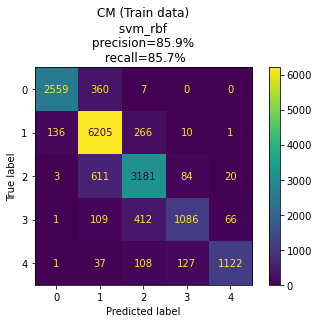

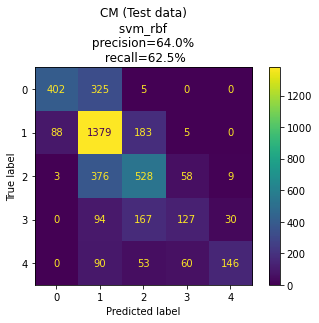

In [65]:
import seaborn as sns 
import pylab as pl
# Try resetting it 
sns.reset_orig() 
cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
pl.title('CM (Train data)\n svm_rbf \n precision=85.9% \n recall=85.7%')
pl.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
pl.title('CM (Test data)\n svm_rbf \n precision=64.0% \n recall=62.5%')
pl.show()

In [66]:
y_test_pred[1005:1015]

array([0, 4, 1, 1, 3, 4, 1, 2, 1, 2], dtype=int64)

In [67]:
y_test.iloc[1005:1015].values


[0, 4, 1, 2, 3, 4, 2, 2, 1, 3]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [68]:
y_train_pred[5005:5015]

array([3, 1, 1, 1, 1, 2, 4, 2, 1, 1], dtype=int64)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
tree_cls = DecisionTreeClassifier(max_depth=20)
tree_cls.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [81]:
y_train_pred = tree_cls.predict(X_train)
y_test_pred = tree_cls.predict(X_test)


In [82]:
tree_cls_train_accuracy = accuracy_score(y_train, y_train_pred)
tree_cls_train_mcc = matthews_corrcoef(y_train, y_train_pred)
tree_cls_train_f1 = f1_score(y_train, y_train_pred,average="weighted")
tree_cls_test_accuracy = accuracy_score(y_test, y_test_pred)
tree_cls_test_mcc = matthews_corrcoef(y_test, y_test_pred)
tree_cls_test_f1 = f1_score(y_test, y_test_pred,average="weighted")
tree_cls_train_precision_score =precision_score(y_train,y_train_pred,average='weighted')
tree_cls_train_recall_score=recall_score(y_train,y_train_pred,average='weighted')
tree_cls_test_precision_score = precision_score(y_test,y_test_pred,average='weighted')
tree_cls_test_recall_score = recall_score(y_test,y_test_pred,average='weighted')


In [83]:
print("Model Performance on training Set")
print("Accuracy: %s" % tree_cls_train_accuracy)
print("MCC: %s" % tree_cls_train_mcc)
print("F1_Score: %s" % tree_cls_train_f1)
print("Precision_Score: %s" % tree_cls_train_precision_score)
print("recall_score: %s" % tree_cls_train_recall_score)
print("Model Performance on test")
print("Accuracy: %s" % tree_cls_test_accuracy)
print("MCC: %s" % tree_cls_test_mcc)
print("F1_Score: %s" % tree_cls_test_f1)
print("Precision_Score: %s" % tree_cls_test_precision_score)
print("recall_score: %s" % tree_cls_test_recall_score)


Model Performance on training Set
Accuracy: 0.981468023255814
MCC: 0.97478089145145
F1_Score: 0.9814503357588766
Precision_Score: 0.9816480273035413
recall_score: 0.981468023255814
Model Performance on test
Accuracy: 0.6375968992248062
MCC: 0.5067464561836196
F1_Score: 0.6380223439518071
Precision_Score: 0.6385054047658497
recall_score: 0.6375968992248062


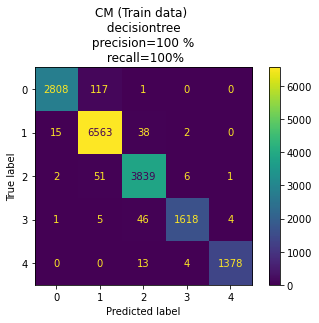

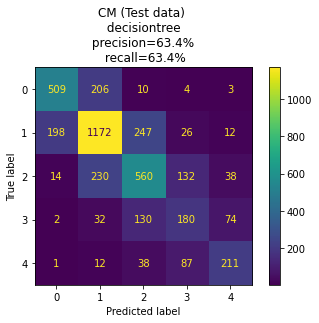

In [84]:
import seaborn as sns 
import pylab as pl
# Try resetting it 
sns.reset_orig() 
cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
pl.title('CM (Train data) \n decisiontree \n precision=100 % \n recall=100%')
pl.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
pl.title('CM (Test data) \n decisiontree \n precision=63.4% \n recall=63.4%')
pl.show()

In [85]:
y_test_pred[1005:1015]

array([0, 4, 1, 1, 3, 4, 2, 2, 0, 1], dtype=int64)

In [86]:
y_train_pred[5005:5015]

array([3, 1, 1, 1, 1, 4, 4, 2, 1, 1], dtype=int64)

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest_reg= RandomForestClassifier(max_depth=25)
forest_reg.fit(X_train,y_train)


RandomForestClassifier(max_depth=25)

In [100]:
y_train_pred = forest_reg.predict(X_train)
y_test_pred = forest_reg.predict(X_test)

In [101]:
forest_reg_train_accuracy = accuracy_score(y_train, y_train_pred)
forest_reg_train_mcc = matthews_corrcoef(y_train, y_train_pred)
forest_reg_train_f1 = f1_score(y_train, y_train_pred,average="weighted")
forest_reg_test_accuracy = accuracy_score(y_test, y_test_pred)
forest_reg_test_mcc = matthews_corrcoef(y_test, y_test_pred)
forest_reg_test_f1 = f1_score(y_test, y_test_pred,average="weighted")
forest_reg_train_precision_score =precision_score(y_train,y_train_pred,average='weighted')
forest_reg_train_recall_score=recall_score(y_train,y_train_pred,average='weighted')
forest_reg_test_precision_score = precision_score(y_test,y_test_pred,average='weighted')
forest_reg_test_recall_score = recall_score(y_test,y_test_pred,average='weighted')



In [102]:
print("Model Performance on training Set")
print("Accuracy: %s" % forest_reg_train_accuracy)
print("MCC: %s" % forest_reg_train_mcc)
print("F1_Score: %s" % forest_reg_train_f1)
print("Precision_Score: %s" % forest_reg_train_precision_score)
print("recall_score: %s" % forest_reg_train_recall_score)
print("Model Performance on test")
print("Accuracy: %s" % forest_reg_test_accuracy)
print("MCC: %s" % forest_reg_test_mcc)
print("F1_Score: %s" % forest_reg_test_f1)
print("Precision_Score: %s" % forest_reg_test_precision_score)
print("recall_score: %s" % forest_reg_test_recall_score)


Model Performance on training Set
Accuracy: 0.9973958333333334
MCC: 0.9964562057429764
F1_Score: 0.9973965389266122
Precision_Score: 0.9974003840081723
recall_score: 0.9973958333333334
Model Performance on test
Accuracy: 0.7122093023255814
MCC: 0.6030553048679939
F1_Score: 0.7084694802298325
Precision_Score: 0.7088764337463561
recall_score: 0.7122093023255814


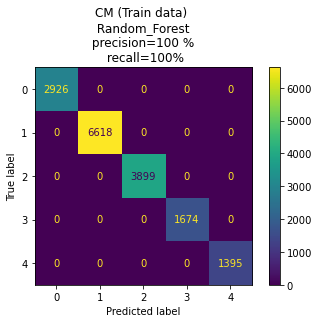

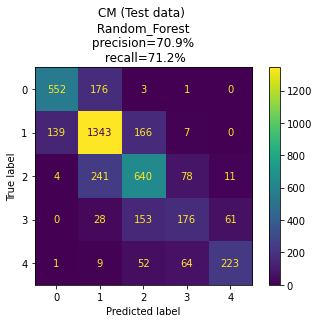

In [132]:
import seaborn as sns 
import pylab as pl
# Try resetting it 
sns.reset_orig() 
cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
pl.title('CM (Train data) \n Random_Forest \n precision=100 % \n recall=100%')
pl.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
pl.title('CM (Test data) \n Random_Forest \n precision=70.9% \n recall=71.2%')
pl.show()

In [133]:
y_test_pred[1005:1015]

array([0, 4, 1, 1, 3, 4, 1, 2, 1, 4], dtype=int64)

In [134]:
y_train_pred[5005:5015]

array([3, 1, 1, 1, 1, 4, 4, 2, 1, 1], dtype=int64)

In [126]:
"""#Build Stacked Model

#Define estimators
from sklearn.ensemble import StackingClassifier


estimators = [("svm_rbf", svm_rbf),
             ("forest_reg",forest_reg),
             ("tree_cls",tree_cls)]
             

#Build Stack Model
stack_model=StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())
                               
stack_model.fit(X_train,y_train)"""



'#Build Stacked Model\n\n#Define estimators\nfrom sklearn.ensemble import StackingClassifier\n\n\nestimators = [("svm_rbf", svm_rbf),\n             ("forest_reg",forest_reg),\n             ("tree_cls",tree_cls)]\n             \n\n#Build Stack Model\nstack_model=StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())\n                               \nstack_model.fit(X_train,y_train)'

In [73]:
#y_train_pred = stack_model.predict(X_train)

In [74]:
#y_test_pred = stack_model.predict(X_test)

In [75]:
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred)
stack_model_train_f1 = f1_score(y_train, y_train_pred,average="weighted")
stack_model_train_precision_score = precision_score(y_train,y_train_pred,average='weighted')
stack_model_train_recall_score = recall_score(y_train,y_train_pred,average='weighted')
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred)
stack_model_test_f1 = f1_score(y_test, y_test_pred,average="weighted")
stack_model_test_precision_score = precision_score(y_test,y_test_pred,average='weighted')
stack_model_test_recall_score = recall_score(y_test,y_test_pred,average='weighted')

print("Model Performance on training Set")
print("Accuracy: %s" % stack_model_train_accuracy)
print("MCC: %s" % stack_model_train_mcc)
print("F1_Score: %s" % stack_model_train_f1)
print("Precision_Score: %s" % stack_model_train_precision_score)
print("recall_score: %s" % stack_model_train_recall_score)

print("Model Performance on test Set")
print("Accuracy: %s" % stack_model_test_accuracy)
print("MCC: %s" % stack_model_test_mcc)
print("F1_Score: %s" % stack_model_test_f1)
print("Precision_Score: %s" % stack_model_test_precision_score)
print("recall_score: %s" % stack_model_test_recall_score)


Model Performance on training Set
Accuracy: 0.9874031007751938
MCC: 0.9828530619988216
F1_Score: 0.9873594192611245
Precision_Score: 0.9874374331002042
recall_score: 0.9874031007751938
Model Performance on test Set
Accuracy: 0.6988856589147286
MCC: 0.5865417997337263
F1_Score: 0.6973279108837183
Precision_Score: 0.6979820225391583
recall_score: 0.6988856589147286


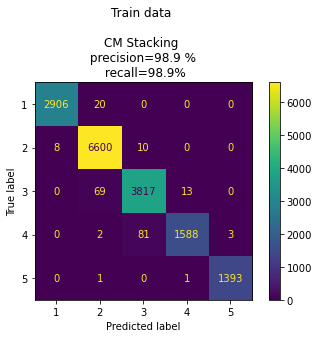

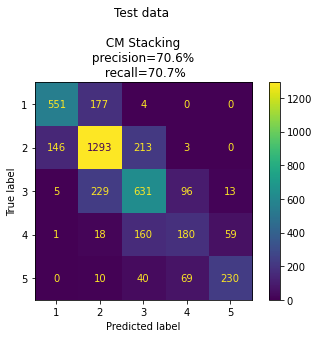

In [76]:
"""import seaborn as sns 
import pylab as pl
# Try resetting it 
sns.reset_orig() 
cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
pl.title('Train data \n \nCM Stacking \n precision=98.9 % \n recall=98.9%')
pl.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
pl.title('Test data \n \n CM Stacking \n precision=70.6% \n recall=70.7%')
pl.show()"""

In [118]:
#Build Stacked Model

#Define estimators
from sklearn.ensemble import StackingClassifier
#from sklearn.linear_model import LogisticRegression

estimators = [("knn", knn),
             ("svm_rbf", svm_rbf),
             ("forest_reg",forest_reg),
             ("tree_cls",tree_cls)]
             

#Build Stack Model
stack_model=StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())
                               
stack_model.fit(X_train,y_train)



StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('svm_rbf', SVC(C=1, gamma=2)),
                               ('forest_reg', RandomForestClassifier()),
                               ('tree_cls', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier())

In [119]:
y_train_pred = stack_model.predict(X_train)

In [120]:
y_test_pred = stack_model.predict(X_test)

In [121]:
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred)
stack_model_train_f1 = f1_score(y_train, y_train_pred,average="weighted")
stack_model_train_precision_score = precision_score(y_train,y_train_pred,average='weighted')
stack_model_train_recall_score = recall_score(y_train,y_train_pred,average='weighted')
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred)
stack_model_test_f1 = f1_score(y_test, y_test_pred,average="weighted")
stack_model_test_precision_score = precision_score(y_test,y_test_pred,average='weighted')
stack_model_test_recall_score = recall_score(y_test,y_test_pred,average='weighted')

print("Model Performance on training Set")
print("Accuracy: %s" % stack_model_train_accuracy)
print("MCC: %s" % stack_model_train_mcc)
print("F1_Score: %s" % stack_model_train_f1)
print("Precision_Score: %s" % stack_model_train_precision_score)
print("recall_score: %s" % stack_model_train_recall_score)

print("Model Performance on test Set")
print("Accuracy: %s" % stack_model_test_accuracy)
print("MCC: %s" % stack_model_test_mcc)
print("F1_Score: %s" % stack_model_test_f1)
print("Precision_Score: %s" % stack_model_test_precision_score)
print("recall_score: %s" % stack_model_test_recall_score)

Model Performance on training Set
Accuracy: 0.9919452519379846
MCC: 0.9890354253272687
F1_Score: 0.9919355459435013
Precision_Score: 0.9919458174307932
recall_score: 0.9919452519379846
Model Performance on test Set
Accuracy: 0.7042151162790697
MCC: 0.5932205736427492
F1_Score: 0.7020592906056329
Precision_Score: 0.7021781623403475
recall_score: 0.7042151162790697


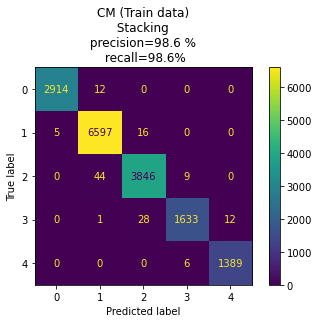

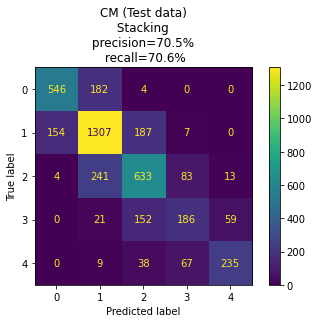

In [122]:
import seaborn as sns 
import pylab as pl
# Try resetting it 
sns.reset_orig() 
cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
pl.title('CM (Train data)\n Stacking \n precision=98.6 % \n recall=98.6%')
pl.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
pl.title('CM (Test data)\n Stacking \n precision=70.5% \n recall=70.6%')
pl.show()

In [123]:
y_test_pred[1005:1015]

array([0, 4, 1, 1, 3, 4, 1, 2, 1, 3], dtype=int64)

In [126]:
y_train.iloc[5005:5015].values

[3, 1, 1, 1, 1, 4, 4, 2, 1, 1]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [127]:
y_train_pred[5005:5015]

array([3, 1, 1, 1, 1, 4, 4, 2, 1, 1], dtype=int64)

In [82]:
"""#Build Stacked Model

#Define estimators
from sklearn.ensemble import StackingClassifier
#from sklearn.linear_model import LogisticRegression

estimators = [("knn", knn),
             ("forest_reg",forest_reg),
             ("tree_cls",tree_cls)]
             

#Build Stack Model
stack_model=StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())
                               
stack_model.fit(X_train,y_train)"""


StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('forest_reg', RandomForestClassifier()),
                               ('tree_cls', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier())

In [83]:
#y_train_pred = stack_model.predict(X_train)

In [84]:
#y_test_pred = stack_model.predict(X_test)

In [85]:
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred)
stack_model_train_f1 = f1_score(y_train, y_train_pred,average="weighted")
stack_model_train_precision_score = precision_score(y_train,y_train_pred,average='weighted')
stack_model_train_recall_score = recall_score(y_train,y_train_pred,average='weighted')
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred)
stack_model_test_f1 = f1_score(y_test, y_test_pred,average="weighted")
stack_model_test_precision_score = precision_score(y_test,y_test_pred,average='weighted')
stack_model_test_recall_score = recall_score(y_test,y_test_pred,average='weighted')

print("Model Performance on training Set")
print("Accuracy: %s" % stack_model_train_accuracy)
print("MCC: %s" % stack_model_train_mcc)
print("F1_Score: %s" % stack_model_train_f1)
print("Precision_Score: %s" % stack_model_train_precision_score)
print("recall_score: %s" % stack_model_train_recall_score)

print("Model Performance on test Set")
print("Accuracy: %s" % stack_model_test_accuracy)
print("MCC: %s" % stack_model_test_mcc)
print("F1_Score: %s" % stack_model_test_f1)
print("Precision_Score: %s" % stack_model_test_precision_score)
print("recall_score: %s" % stack_model_test_recall_score)

Model Performance on training Set
Accuracy: 0.9706274224806202
MCC: 0.9600346153735976
F1_Score: 0.9706248397547502
Precision_Score: 0.9706304713366888
recall_score: 0.9706274224806202
Model Performance on test Set
Accuracy: 0.6925872093023255
MCC: 0.5774747254398643
F1_Score: 0.6907616066870791
Precision_Score: 0.691174112290108
recall_score: 0.6925872093023255


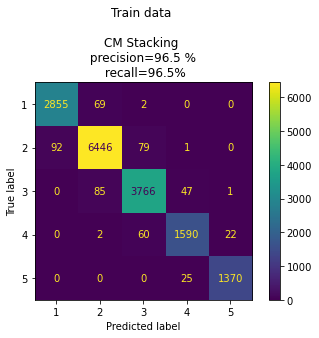

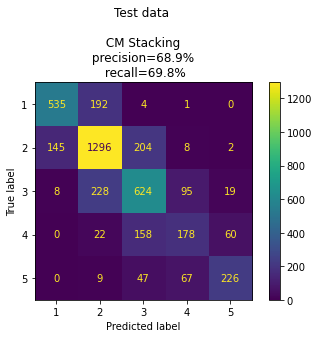

In [86]:
"""import seaborn as sns 
import pylab as pl
# Try resetting it 
sns.reset_orig() 
cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
pl.title('Train data \n \nCM Stacking \n precision=96.5 % \n recall=96.5%')
pl.show()

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
pl.title('Test data \n \n CM Stacking \n precision=68.9% \n recall=69.8%')
pl.show()"""